## LAB - CLEANING NUMERICAL DATA

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [39]:
list(customer_df.head())

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [40]:
customer_df.shape

(9134, 24)

In [41]:
# Changing the column names to snakecase
cols = []
for column in customer_df.columns:
    cols.append(column.lower())
cols
customer_df.columns = cols
customer_df.columns = customer_df.columns.str.replace("[ ]", "_", regex=True)
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [42]:
# Changing effective to date column to datetime format.
customer_df.dtypes
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [43]:
#Create a new dataframe using only the numerical data called numerical_df. Use this for the following questions.
numerical_df=customer_df.select_dtypes(np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [44]:
#Define a function that differentiates between continuous and discrete variables. 
#Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do 
#the same for discrete_df
continuous_df = numerical_df[['customer_lifetime_value','income','monthly_premium_auto','total_claim_amount']]
discrete_df = numerical_df[['months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
# numerical_df['total_claim_amount'].value_counts(dropna=False)
# continuous_df=numerical_df['customer_lifetime_value','income','total_claim_amount']
# def separate_continuous_discrete_data (df):
#     continuous_cols = []
#     discrete_cols = []
#     for col in df.columns:
#     if df[col].dtype =='float64' or df[col].dtype=='int64':
#         if len(df[col].unique())>10:
#             continuous_cols.append(col)
#         else:
#             discrete_cols.append(col)
#     else:
#         discrete_cols.append(col)
#     continuous_df = df [continuous_cols]
#     discrete_df = df[discrete_cols]
#     return continuous_df, discrete_df

In [45]:
continuous_df
discrete_df

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


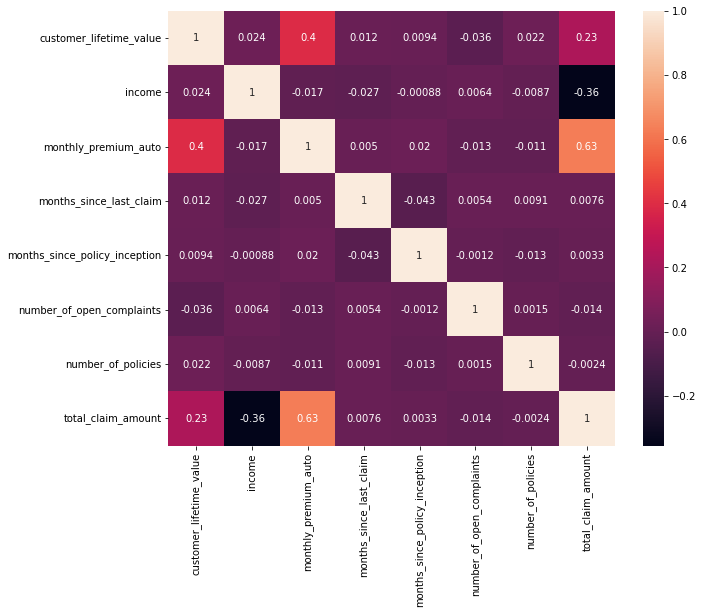

In [46]:
#Plot a correlation matrix, comment what you see.
corr_matrix=numerical_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

## 9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

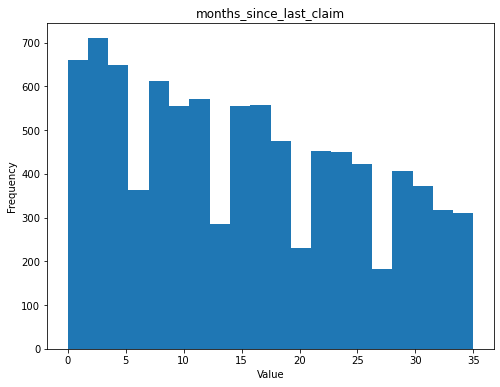

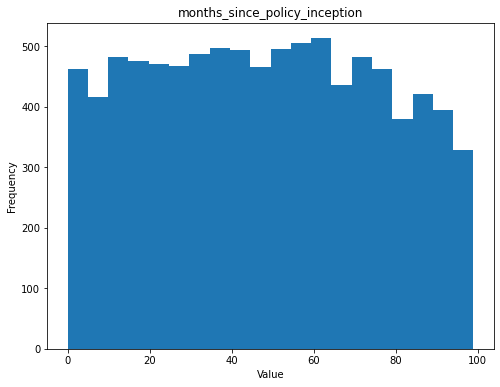

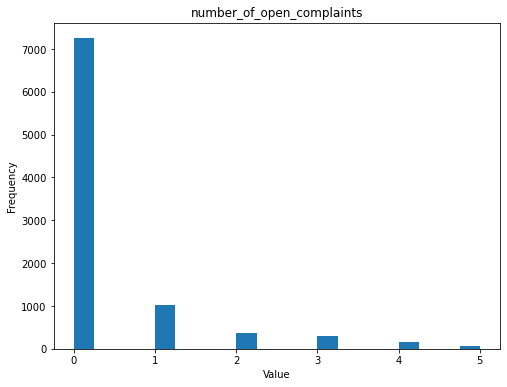

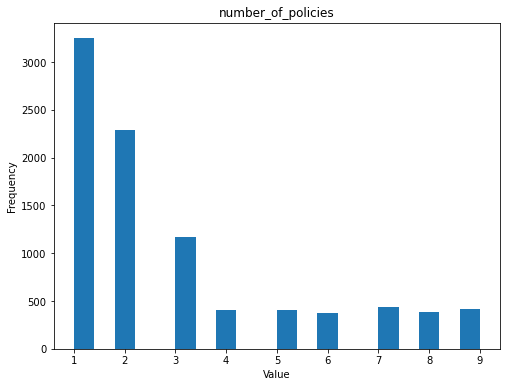

In [47]:
def plot(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20)
        plt.title(col)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.show()
plot(discrete_df)

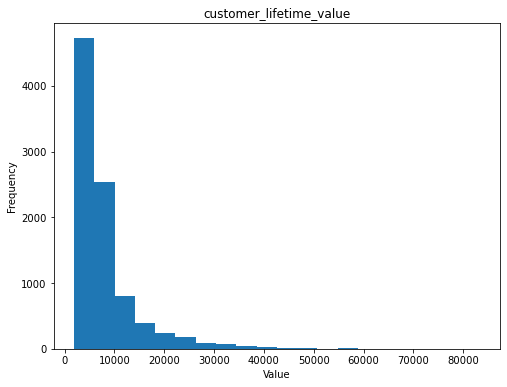

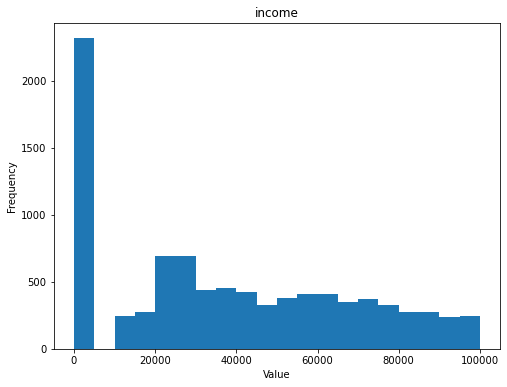

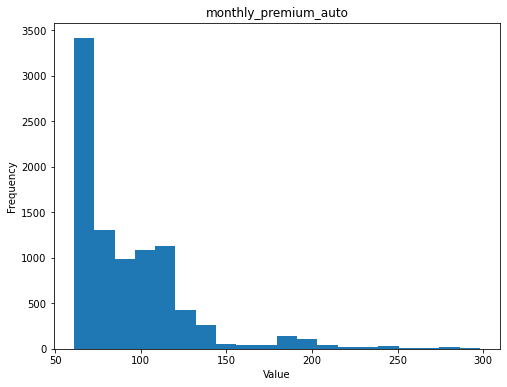

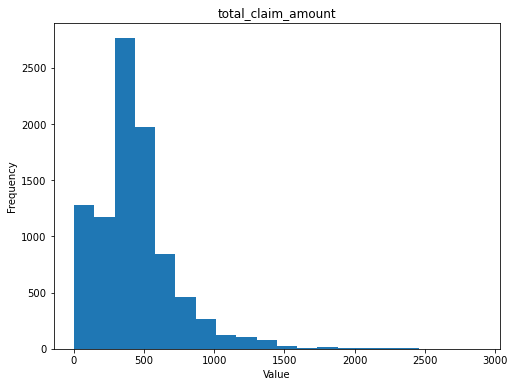

In [48]:
def plot(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20)
        plt.title(col)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.show()
plot(continuous_df)

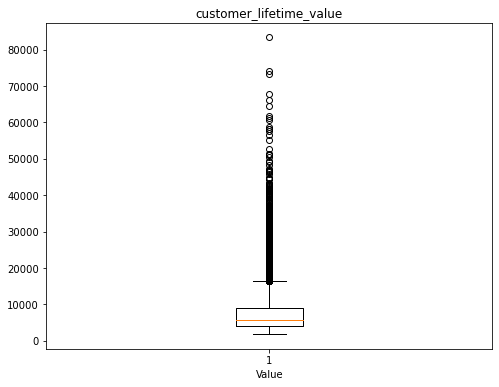

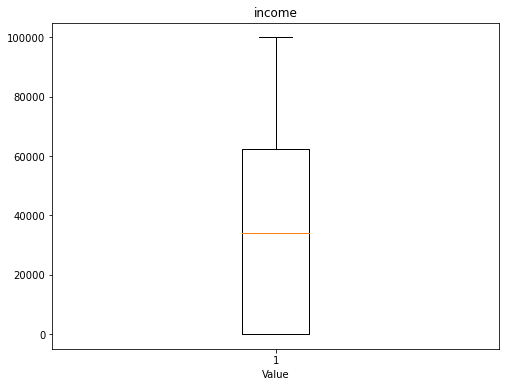

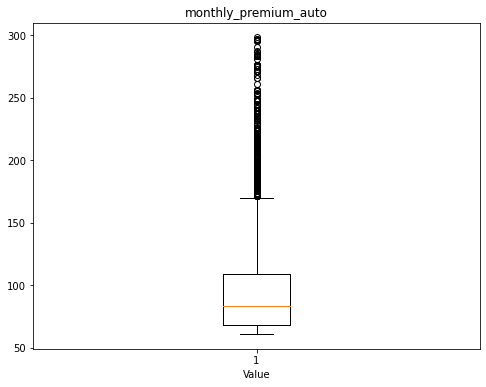

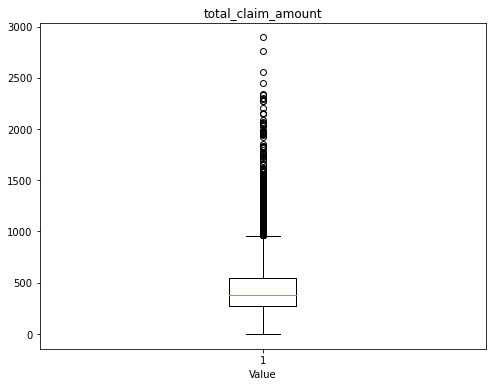

In [49]:
def plot_boxplots(df):
    """
    Plot a boxplot for every column in a pandas dataframe.
    """
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[col])
        plt.title(col)
        plt.xlabel("Value")
        plt.show()
        
plot_boxplots(continuous_df)

In [50]:
#10. Comment what you can see in the plots.
#The discrete variables are partially normally distributed.
#The continous variables are highly skewed.
# There are some outliers in continous variable.

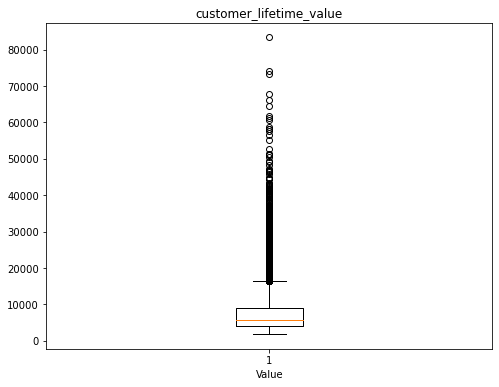

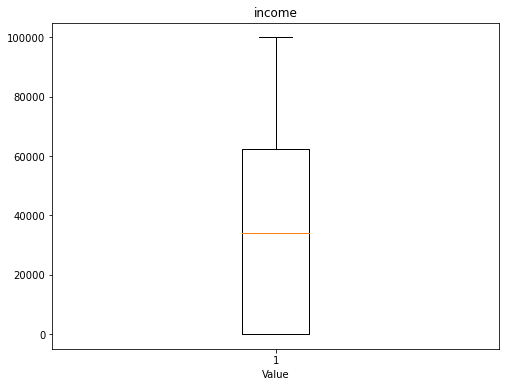

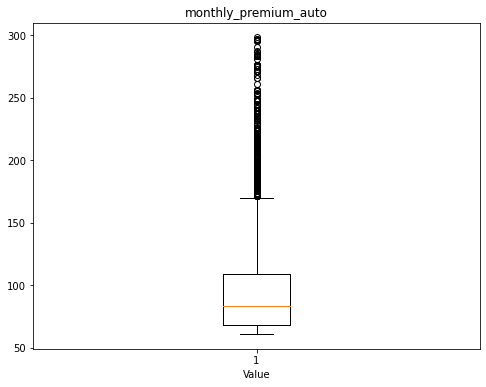

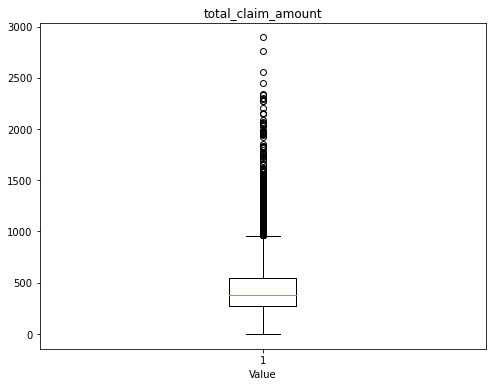

In [51]:
# 11.Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
plot_boxplots(continuous_df)

In [52]:
#12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.
#Outliers are present in 'customer_lifetime_value' and 'total_claim_amount'
continuous_df['customer_lifetime_value'].value_counts(dropna=False)
continuous_df['total_claim_amount'].value_counts(dropna=False)

316.800000    116
292.800000    110
312.000000    108
350.400000    105
331.200000    102
             ... 
212.009825      1
314.880326      1
707.925645      1
246.993145      1
204.620759      1
Name: total_claim_amount, Length: 5106, dtype: int64

In [53]:
np.nanpercentile(continuous_df['customer_lifetime_value'],75)
iqr = np.nanpercentile(continuous_df['customer_lifetime_value'],75) - np.nanpercentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = continuous_df[continuous_df['customer_lifetime_value'] >50000]
len(extraordinary_points) 

#I am not removing the outliers as it will remove all the Nan values

16414.039911750002


20

In [54]:
#13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.
customer_df.isnull().sum()/len(customer_df)*100

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [55]:
#Since there are no null values, am going to remove the outliers.
customer_lifetime_value_dropped = continuous_df[continuous_df['customer_lifetime_value'] <= 50000].copy()
len(customer_lifetime_value_dropped)

9114

In [56]:
# Dropping the rows in the main database
customer_df_dropped=customer_df[customer_df['customer_lifetime_value'] <= 50000].copy()
len(customer_df_dropped)

9114

In [57]:
#14.Save the numerical_df to csv as numerical.csv You will use this file again this week.
numerical_df.to_csv('numerical.csv', index=False)

## Lab | Cleaning categorical data

In [58]:
#2.Find all of the categorical data. Save it in a categorical_df variable.
categorical_df=customer_df_dropped.select_dtypes('object')
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [69]:
#3.Check for NaN values and decide what to do with them, do it now.
customer_df_dropped.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [60]:
#4.Check all unique values of columns. Created a function which returns all the unique values of column as Dictionary.
def get_unique_values(dataframe):
    unique_values_dict = {}
    for column in dataframe.columns:
        unique_values_dict[column] = dataframe[column].unique().tolist()
    return unique_values_dict
get_unique_values(categorical_df)

{'customer': ['BU79786',
  'QZ44356',
  'AI49188',
  'WW63253',
  'HB64268',
  'OC83172',
  'XZ87318',
  'CF85061',
  'DY87989',
  'BQ94931',
  'SX51350',
  'VQ65197',
  'DP39365',
  'SJ95423',
  'IL66569',
  'BW63560',
  'FV94802',
  'OE15005',
  'WC83389',
  'FL50705',
  'ZK25313',
  'SV62436',
  'YH23384',
  'TZ98966',
  'HM55802',
  'FS42516',
  'US89481',
  'HO30839',
  'GE62437',
  'EJ77678',
  'SV85652',
  'UL64533',
  'PF41800',
  'AO98601',
  'SK67821',
  'YV55495',
  'KY38074',
  'DM79012',
  'CM61827',
  'WC35801',
  'QG25316',
  'MB98372',
  'IL19217',
  'SR38658',
  'DH41343',
  'HG65722',
  'BU27331',
  'XM45289',
  'KP34198',
  'SH90947',
  'WE95729',
  'PY51963',
  'RB69909',
  'XR95069',
  'FR46645',
  'SY17488',
  'AP67935',
  'FS37417',
  'ML29312',
  'UB61619',
  'CD86811',
  'RU83859',
  'FG63582',
  'NN71951',
  'WB37082',
  'SM52139',
  'FL82372',
  'DP45816',
  'GW33762',
  'RZ33670',
  'PY70169',
  'MO91628',
  'HW87852',
  'HB20453',
  'BN87372',
  'YX23800',


In [61]:
#5.Check dtypes. Do they all make sense as categorical data?
categorical_df.dtypes
#Some are alpha-numerical

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [62]:
#6.Does any column contain alpha and numeric data? Decide how to clean it and do it now.
display(categorical_df['policy'].value_counts(dropna=False))
display(categorical_df['renew_offer_type'].value_counts(dropna=False))


Personal L3     3417
Personal L2     2118
Personal L1     1235
Corporate L3    1013
Corporate L2     594
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3741
Offer2    2919
Offer3    1431
Offer4    1023
Name: renew_offer_type, dtype: int64

In [63]:
#For 'policy' L3 will be renamed as Low, L2 as medium, L1 as Low
def clean_policy(x):
    if x == 'Personal L3':
        return 'Personal High'
    elif x == 'Personal L2':
        return 'Personal Medium'
    elif x == 'Personal L1':
        return 'Personal Low'
    elif x == 'Corporate L3':
        return 'Corporate High'
    elif x == 'Corporate L2':
        return 'Corporate Medium'
    elif x == 'Corporate L1':
        return 'Corporate Low'
    elif x == 'Special L3':
        return 'Special High'
    elif x == 'Special L2':
        return 'Special Medium'
    elif x == 'Special L1':
        return 'Special Low'
    else:
        return 

categorical_df['policy'] = categorical_df['policy'].apply(clean_policy)
display(categorical_df['policy'].value_counts(dropna=False))

<ipython-input-63-9a1271eb3e1f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['policy'] = categorical_df['policy'].apply(clean_policy)


Personal High       3417
Personal Medium     2118
Personal Low        1235
Corporate High      1013
Corporate Medium     594
Corporate Low        359
Special Medium       164
Special High         148
Special Low           66
Name: policy, dtype: int64

In [64]:
# For 'renew_offer_type' the variables will be made as 1,2,3,4 for respective offers 
def clean_offer(x):
    if x == 'Offer1':
        return '1'
    elif x == 'Offer2':
        return '2'
    elif x == 'Offer3':
        return '3'
    elif x=='Offer4':
        return '4'
    else:
        return
    
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].apply(clean_offer)
display(categorical_df['renew_offer_type'].value_counts(dropna=False))

<ipython-input-64-71b48619117f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].apply(clean_offer)


1    3741
2    2919
3    1431
4    1023
Name: renew_offer_type, dtype: int64

In [65]:
#7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
# Now column 'renew_offer_type' is with numbers, I am going to convert it as numerical column.
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].astype('int')
categorical_df.dtypes


<ipython-input-65-91db5043f15a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].astype('int')


customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type     int64
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [66]:
#8.Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
display(categorical_df['policy_type'])
display(categorical_df['policy'])
# I think 'policy' is a subset of 'policy_type'. So I would drop 'policy_type'

0       Corporate Auto
1        Personal Auto
2        Personal Auto
3       Corporate Auto
4        Personal Auto
             ...      
9129     Personal Auto
9130    Corporate Auto
9131    Corporate Auto
9132     Personal Auto
9133    Corporate Auto
Name: policy_type, Length: 9114, dtype: object

0         Corporate High
1          Personal High
2          Personal High
3       Corporate Medium
4           Personal Low
              ...       
9129        Personal Low
9130      Corporate High
9131    Corporate Medium
9132     Personal Medium
9133      Corporate High
Name: policy, Length: 9114, dtype: object

In [67]:
# 9.Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.
unique_counts = categorical_df.nunique()
unique_counts
# I am not sure they can be combined

customer            9114
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [68]:
#10. Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.
categorical_df.to_csv('categorical.csv', index=False)